In [31]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seting my favourite colors  for graphs
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Defining the main folder path
main_folder = "/content/drive/My Drive/PSD assignment"

# Defining the subfolders and the required respective subdirectories
subfolders = {
    "Frailty": ["Data_Raw", "Data_Clean", "Results"],
    "StudentsPerformance": ["Data_Raw", "Data_Clean", "Results"]
}

# Function to create directories
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created: {path}")
    else:
        print(f"Already exists: {path}")

# Now iterating through each subfolder and its subdirectories
for subfolder, subdirs in subfolders.items():
    subfolder_path = os.path.join(main_folder, subfolder)
    create_directory(subfolder_path)
    for subdir in subdirs:
        subdir_path = os.path.join(subfolder_path, subdir)
        create_directory(subdir_path)

print("Folder structure setup complete!")


Already exists: /content/drive/My Drive/PSD assignment/Frailty
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Data_Raw
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Data_Clean
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Results
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Raw
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Clean
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Results
Folder structure setup complete!


In [51]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   ├── Frailty.ipynb
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    ├── Data_Raw
    │   └── StudentsPerformance.csv
    └── Results

8 directories, 5 files


#Reading the raw data

In [52]:
#File path
file_path = "/content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Raw/StudentsPerformance.csv"

# Reading the CSV file where we have the frailty data
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


#Cleaning the data

In [54]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Note: We found there is no null values in the data so we are saving this as clean data.

In [56]:
#saving the copy of data as clean data
# Path of the folder where clean data is to be saved
save_path = "/content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Clean/clean_data.csv"

# Save the cleaned dataframe
df.to_csv(save_path, index=False)

print("Cleaned data saved successfully at:", save_path)

Cleaned data saved successfully at: /content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Clean/clean_data.csv


In [57]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   ├── Frailty.ipynb
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    │   └── clean_data.csv
    ├── Data_Raw
    │   └── StudentsPerformance.csv
    └── Results

8 directories, 6 files


#Data Visualizations

## 1) Distribution of Scores (Math, Reading, Writing)

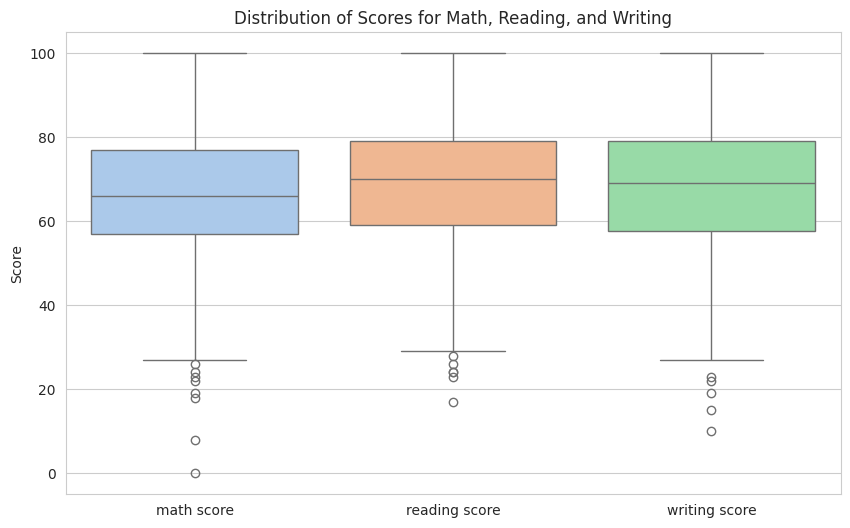

In [58]:
# Create a boxplot for each subject (Math, Reading, Writing)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["math score", "reading score", "writing score"]])
plt.title("Distribution of Scores for Math, Reading, and Writing")
plt.ylabel("Score")
# Save the figure
plt.savefig("/content/drive/My Drive/PSD assignment/StudentsPerformance/Results/distribution_of_scores.png")
plt.show()

##This boxplot explains us how scores in each subject are distributed. This helps us to easily compare the variation in each subject's scores. Here the majority of the scores of each subjects is distributed around 60-80

## 2) Parental Level of Education vs. Scores

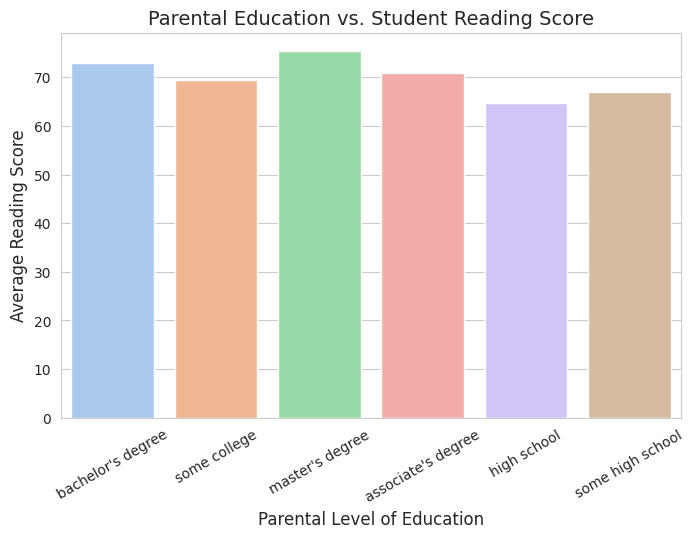

In [59]:
plt.figure(figsize=(8, 5))

# Assign `hue` and disable legend to fix the warning
sns.barplot(x=df["parental level of education"], y=df["reading score"], hue=df["parental level of education"], errorbar=None, palette="pastel", legend=False)

plt.xticks(rotation=30)
plt.xlabel("Parental Level of Education", fontsize=12)
plt.ylabel("Average Reading Score", fontsize=12)
plt.title("Parental Education vs. Student Reading Score", fontsize=14)

# Save the figure
plt.savefig("/content/drive/My Drive/PSD assignment/StudentsPerformance/Results/bar_parental_education.png")

plt.show()





## This bar Plot Compares reading scores based on parents education this helps us to  understand the impact of family background on reading score of the students. The students whose parents having masters degree have the high reading score. Although we need to further investigate if this assuption is trure.

## 3) Correlation Heatmap

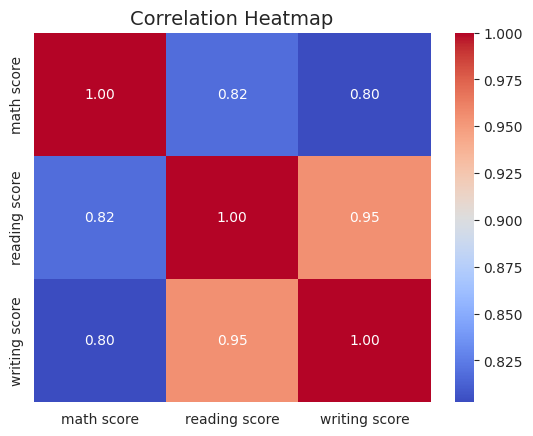

In [60]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap", fontsize=14)

# Save the corelation heat map image
plt.savefig("/content/drive/My Drive/PSD assignment/StudentsPerformance/Results/correlation_heatmap.png")

plt.show()

##correlation Heatmap helps us understaing the relationships between different scores.

## 4) Scatter Plot

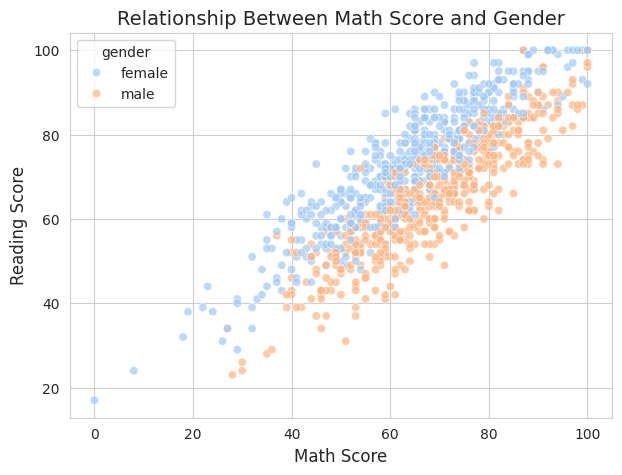

In [61]:
# Create the scatter plot
plt.figure(figsize=(7, 5))

sns.scatterplot(x=df["math score"], y=df["reading score"], hue=df["gender"], alpha=0.7)

# Label and title
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Reading Score", fontsize=12)
plt.title("Relationship Between Math Score and Gender", fontsize=14)

# Save the scatter plot image
plt.savefig("/content/drive/My Drive/PSD assignment/StudentsPerformance/Results/scatterplot.png")

# Show the plot
plt.show()

## This scatter plot gives us the trend and relationship betweent math and reading score to the gender. We can see clearly that there is positive Correlation as math scores increase, reading scores also tend to increase. There is a littel ovelap between males and females.

## 5) Histogram (Math Scores Distribution)

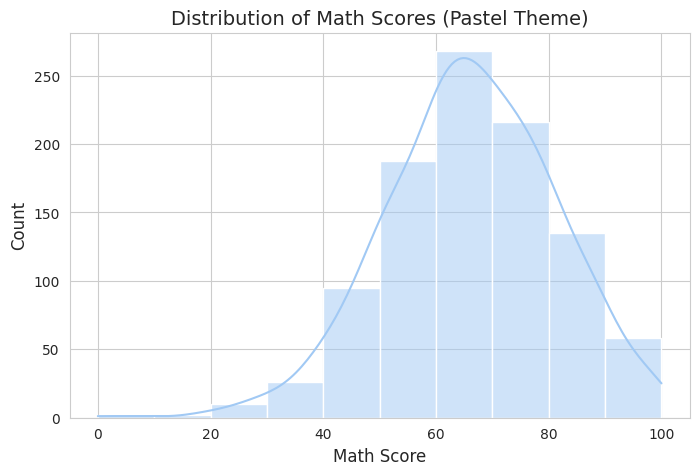

In [62]:
# Create the plot
plt.figure(figsize=(8, 5))
sns.histplot(df["math score"], bins=10, kde=True)

plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Math Scores (Pastel Theme)", fontsize=14)


# Save the histogram image
plt.savefig("/content/drive/My Drive/PSD assignment/StudentsPerformance/Results/histogram.png")

# Show the plot
plt.show()



##This help us understand that math score is right skewed, meaning there are more studets who scored above the mean in math.

In [63]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   ├── Frailty.ipynb
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    │   └── clean_data.csv
    ├── Data_Raw
    │   └── StudentsPerformance.csv
    └── Results
        ├── bar_parental_education.png
        ├── correlation_heatmap.png
        ├── distribution_of_scores.png
        ├── histogram.png
        └── scatterplot.png

8 directories, 11 files
